In [9]:
%pylab inline
import skimage
import skimage.morphology
import scipy.ndimage.morphology
import numpy as np

Populating the interactive namespace from numpy and matplotlib


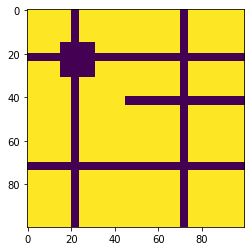

In [88]:
mask = np.ones([100, 100], dtype=bool)

# --
mask[20:24,:] = False 
mask[70:74,:] = False

# ||
mask[:,20:24] = False
mask[:,70:74] = False

# half line
mask[40:44,45:] = False

#
mask[15:31,15:31] = False 

plt.imshow(mask)



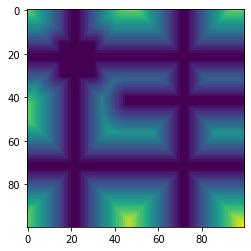

In [13]:
dist = scipy.ndimage.morphology.distance_transform_edt(mask)
imshow(dist)

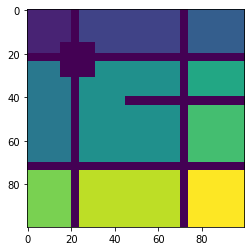

In [15]:
lab = skimage.morphology.label(mask)
imshow(lab)

In [39]:
mxs = [None] * (np.max(lab)-1)
for l in range(1, np.max(lab)):
#     if l == 0:
#         mxs[l] = (l,())
#         continue
    dist_i = scipy.ndimage.morphology.distance_transform_edt(lab == l)
    mx = np.max(dist_i)
    xyz = np.unravel_index(np.argmax(dist_i), shape = lab.shape)
    mxs[l-1] = (mx, xyz)
#     print(xyz)
    

In [40]:
mxs

[(20.0, (0, 0)),
 (20.0, (0, 44)),
 (20.0, (0, 93)),
 (20.0, (44, 0)),
 (14.0, (55, 37)),
 (8.0, (31, 81)),
 (13.0, (56, 86)),
 (20.0, (93, 0)),
 (23.0, (96, 46))]

In [41]:
mxs.sort(key=lambda x:x[0], reverse=True)
mxs

[(23.0, (96, 46)),
 (20.0, (0, 0)),
 (20.0, (0, 44)),
 (20.0, (0, 93)),
 (20.0, (44, 0)),
 (20.0, (93, 0)),
 (14.0, (55, 37)),
 (13.0, (56, 86)),
 (8.0, (31, 81))]

In [51]:
dists, coords = zip(*mxs)
dists=np.asarray(dists)
coords=np.asarray(coords)

# alternative faster calculation

In [54]:

dist = scipy.ndimage.morphology.distance_transform_edt(mask)
mxs = [None] * (np.max(lab)-1)
for l in range(1, np.max(lab)):
    dist_i = dist.copy()
    dist_i[lab!=l] = 0
#     if l == 0:
#         mxs[l] = (l,())
#         continue
#     dist_i = scipy.ndimage.morphology.distance_transform_edt(lab == l)
    mx = np.max(dist_i)
    xyz = np.unravel_index(np.argmax(dist_i), shape = lab.shape)
    mxs[l-1] = (mx, xyz)
#     print(xyz)
mxs

[(20.0, (0, 0)),
 (20.0, (0, 44)),
 (20.0, (0, 93)),
 (20.0, (44, 0)),
 (14.0, (55, 37)),
 (8.0, (31, 81)),
 (13.0, (56, 86)),
 (20.0, (93, 0)),
 (23.0, (96, 46))]

In [ ]:
def find_maxdist_in_labeled_image(mask:np.ndarray):
    """
    Find biggest labeled areas in sense of distance from the border
    :param lab:
    :return: dists, coords
    """

    lab = skimage.morphology.label(mask)
    dist = scipy.ndimage.morphology.distance_transform_edt(mask)
    mxs = [None] * (np.max(lab)-1)
    for l in range(1, np.max(lab)):
        dist_i = dist.copy()
        dist_i[lab != l] = 0
        # if l == 0:
        #     mxs[l] = (l, ())
        #     continue
        # dist_i = scipy.ndimage.morphology.distance_transform_edt(lab == l)
        mx = np.max(dist_i)
        xyz = np.unravel_index(np.argmax(dist_i), shape=lab.shape)
        mxs[l-1] = (mx, xyz)


    mxs.sort(key=lambda x:x[0], reverse=True)

    dists, coords = zip(*mxs)
    dists = np.asarray(dists)
    coords = np.asarray(coords)
    return dists, coords

# Kick closest

In [56]:
coords

array([[96, 46],
       [ 0,  0],
       [ 0, 44],
       [ 0, 93],
       [44,  0],
       [93,  0],
       [55, 37],
       [56, 86],
       [31, 81]], dtype=int64)

In [78]:
min_dist = 3

selected = []
for i in range(coords.shape[0] - 1):
    dists = np.linalg.norm((coords[i + 1:,:] - coords[i,:]), axis=1)
    print(dists)
    if (dists > min_dist).all():
        selected.append(coords[i,:])
    else:
        print(f"kicked {coords[i,:]}")
        
selected = np.asarray(selected)
selected

[106.45186706  96.02083107 106.88779163  69.42621983  46.09772229
  41.97618372  56.56854249  73.8241153 ]
[ 44.          93.          44.          93.          66.28725368
 102.62553289  86.72946443]
[ 49.          62.22539674 102.88342918  55.4436651   70.
  48.27007354]
[102.88342918 131.5218613   78.49203781  56.43580424  33.24154028]
[49.         38.60051813 86.83317338 82.03657721]
[ 53.03772242  93.62157871 102.00490184]
[49.01020302 50.11985634]
[25.49509757]


array([[96, 46],
       [ 0,  0],
       [ 0, 44],
       [ 0, 93],
       [44,  0],
       [93,  0],
       [55, 37],
       [56, 86]], dtype=int64)

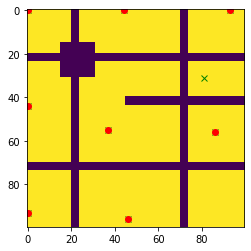

In [86]:
imshow(mask)
plt.plot(coords[:,1], coords[:,0], 'gx')
plt.plot(selected[:,1], selected[:,0], 'ro')